# Proyecto II Bimestre

## Scrapy 

*Scrapy is a fast high-level web crawling and web scraping framework, used to crawl websites and extract structured data from their pages. It can be used for a wide range of purposes, from data mining to monitoring and automated testing.*

### Objetivos
+ Hacer scrapy a una pagina web.
+ Graficar los resultados obtenidos.

### Desarrollo

#### Fuente
La pagina web a utilizarse se dedica a realizar ventas en linea. Los campos que se analizan son el nombre del producto, el rating, el número de piezas, la cantidad de minifiguras con las que cuenta y la cantidad de personas que adquieron el producto.

Se la puede enconetrar en el siguiente enlace: https://brickset.com/




#### Análisis
Los datos obtenidos de la página web se almacenaron en un archivo que facilita el manejo de datos. Almacenamos el archivo y accedemos a el como se muestra a continuación.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
path = "C://Users//yadir//Documents//GitHub//py-quinchiguango-zumba-yadira-liliana//Proyecto IIB//brickset-scraper//file.csv"
df= pd.read_csv(path, encoding = 'unicode_escape',sep = ",")

La pagina web promociona sus productos con ciertas caracteristicas entre las cuales tenemos el numero de piezas que poseen. 
##### Productos con mayor dificultad
Los productos que presentan mayor dificultad son aquellos que poseen el mayor numero de piezas. El producto con mayor dificultad es Firehouse Headquarters al contar con 4634 piezas, seguido por el Big Ben con 4163 piezas.

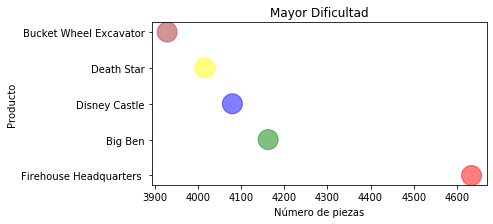

In [2]:
plt.figure(figsize=(6,3))
plt.title('Mayor Dificultad')
plt.xlabel("Número de piezas")
plt.ylabel("Producto")
mayor_numero_piezas = df.sort_values('pieces',ascending=False)[:5]
x=mayor_numero_piezas["pieces"]
y=mayor_numero_piezas["name"]
plt.scatter(x,y, s = (20*1)**2, color = ["red","green","blue","yellow", "brown"], alpha=0.5)
plt.show()

##### Puntuación de productos
Se obtienen las puntuaciones que se muestran a continuacion. Siendo que 98 productos cuentan con la puntuacion mas alta

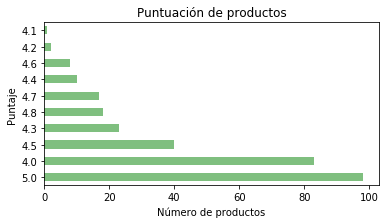

5.0    98
4.0    83
4.5    40
4.3    23
4.8    18
4.7    17
4.4    10
4.6     8
4.2     2
4.1     1
Name: rating, dtype: int64

In [4]:
plt.figure(figsize=(6,3))
plt.title('Puntuación de productos')
plt.xlabel("Número de productos")
plt.ylabel("Puntaje")
mayor_rating = df.sort_values('rating',ascending=False)[:300]
mayor_rating.rating.value_counts().plot(kind='barh', color = "Green", alpha=0.5)
plt.show()

mayor_rating.rating.value_counts()

Si agrupamos los puntajes se obtienen los siguientes porcentajes

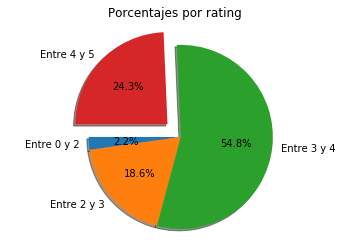

In [5]:
rating = df['rating'].dropna()
rango_rating = [int(r) for r in rating]
entre0y2 = 0  
entre2y3 = 0
entre3y4 = 0
entre4y5 = 0

for i in rango_rating:
    if(i <= 2):
        entre0y2 = entre0y2 + 1
    elif(i <= 3 and i > 2):
        entre2y3 = entre2y3 + 1
    elif(i <= 4 and i > 3):
        entre3y4 = entre3y4 + 1
    else:
        entre4y5 = entre4y5 + 1

rangos = [entre0y2, entre2y3, entre3y4, entre4y5]
rangos_etiqueta = ['Entre 0 y 2', 'Entre 2 y 3', 'Entre 3 y 4', 'Entre 4 y 5']
                   
plt.title("Porcentajes por rating")
e = [0, 0, 0, 0.2]
plt.pie(rangos, labels=rangos_etiqueta, autopct='%1.1f%%', shadow=True, explode=e, startangle=180)
plt.axis('equal')
plt.show()

##### Número de minifiguras
El producto con mayor numero de minifiguras es Death Star con un total de 27 piezas.

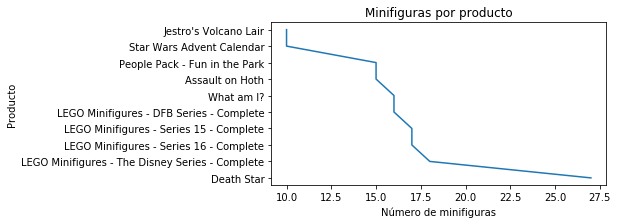

In [6]:
plt.figure(figsize=(6,3))
plt.title("Minifiguras por producto")
plt.xlabel("Número de minifiguras")
plt.ylabel("Producto")
minifiguras = df.sort_values('minifigs',ascending=False)[:10]
x = minifiguras["minifigs"]
y = minifiguras["name"]
plt.plot(x,y)
plt.show()

Si agrupamos los numeros de minifiguras se obtienen los porcentajes mostrados a continuacion. Se observa que el porcentaje de productos que cuentan con un mayor numero de minifiguras es muy reducido en comparacion con aquellas que cuentan con hasta 3.

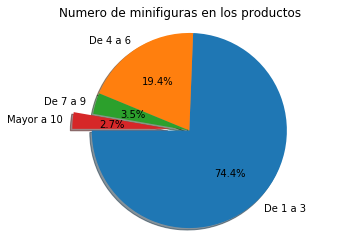

In [7]:
minifigs = df['minifigs'].dropna()
rango_minifigs = [int(m) for m in minifigs]
entre1y3 = 0  
entre4y6 = 0
entre7y9 = 0
mayor10 = 0

for i in rango_minifigs:
    if(i <= 3):
        entre1y3 = entre1y3 + 1
    elif(i <= 6 and i > 3):
        entre4y6 = entre4y6 + 1
    elif(i <= 9 and i > 6):
        entre7y9 = entre7y9 + 1
    else:
        mayor10 = mayor10 + 1

rangos = [entre1y3, entre4y6, entre7y9, mayor10]
rangos_etiqueta = ['De 1 a 3', 'De 4 a 6', 'De 7 a 9', 'Mayor a 10']
                   
plt.title("Numero de minifiguras en los productos")
e = [0, 0, 0, 0.2]
plt.pie(rangos, labels=rangos_etiqueta, autopct='%1.1f%%', shadow=True, explode=e, startangle=180)
plt.axis('equal')
plt.show()

##### Productos mas comprados
El producto con mayor numero de compras es Brick Bank con un total de 15 566 compradores.

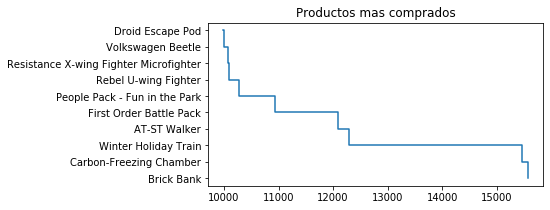

In [9]:
plt.figure(figsize=(6,3))
plt.title("Productos mas comprados")
mas_comprados = df.sort_values('ownthisset',ascending=False)[:10]
y = mas_comprados["name"]
x = mas_comprados["ownthisset"]
plt.step(x,y)
plt.show()

El numero de compradores de los productos es en su mayoria inferior a 1000, son muy pocos aquellos productos que cuantan con mas de 15000 compradores.

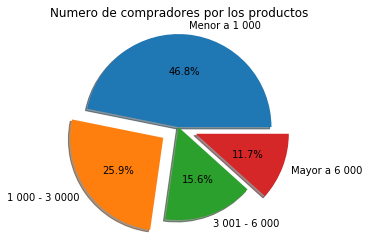

In [10]:
ownthisset = df['ownthisset'].dropna()
rango_ownthisset = [int(m) for m in ownthisset]
hastamil = 0  
hasta3mil = 0
hasta6mil = 0
mayor6mil = 0

for i in rango_ownthisset:
    if(i <= 1000):
        hastamil = hastamil + 1
    elif(i <= 3000 and i > 1000):
        hasta3mil = hasta3mil + 1
    elif(i <= 6000 and i > 3000):
        hasta6mil = hasta6mil + 1
    else:
        mayor6mil = mayor6mil + 1

rangos = [hastamil, hasta3mil, hasta6mil, mayor6mil]
rangos_etiqueta = ['Menor a 1 000', '1 000 - 3 0000', '3 001 - 6 000', 'Mayor a 6 000']
                   
plt.title("Numero de compradores por los productos")
e = [0, 0.2, 0, 0.2]
plt.pie(rangos, labels=rangos_etiqueta, autopct='%1.1f%%', shadow=True, explode=e)
plt.axis('equal')
plt.show()

**Productos LEGO**

Filtramos los productos de la marca LEGO para hacer un analisis con estos unicamente.

In [12]:
productoLEGO = df[df['name'].str.contains("LEGO", case=False)]

##### Productos LEGO mas comprados
Se obtiene cual es el producto de esta marca con mas compradores.

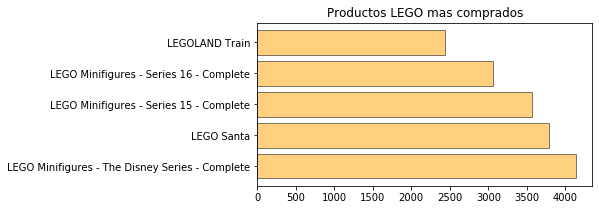

In [14]:
plt.figure(figsize=(6,3))
plt.title("Productos LEGO mas comprados")
mas_comprados = productoLEGO.sort_values('ownthisset',ascending=False)[:5]
x = mas_comprados["name"]
y = mas_comprados["ownthisset"]
plt.barh(x,y, edgecolor='black', color='Orange', alpha=0.5)
plt.show()

##### Productos LEGO con mayor numero de piezas


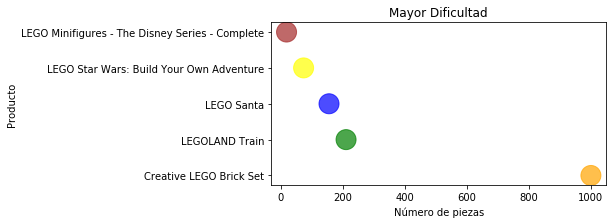

In [19]:
plt.figure(figsize=(6,3))
plt.title('Mayor Dificultad')
plt.xlabel("Número de piezas")
plt.ylabel("Producto")
mayor_numero_piezas_LEGO = productoLEGO.sort_values('pieces',ascending=False)[:5]
x=mayor_numero_piezas_LEGO["pieces"]
y=mayor_numero_piezas_LEGO["name"]
plt.scatter(x,y, s = (20*1)**2, color = ["orange","green","blue","yellow", "brown"], alpha=0.7)
plt.show()

##### Productos LEGO mejor puntuados

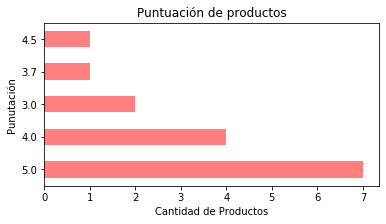

In [21]:
plt.figure(figsize=(6,3))
plt.title('Puntuación de productos')
plt.xlabel("Cantidad de Productos")
plt.ylabel("Punutación")
mayor_rating = productoLEGO.sort_values('rating',ascending=False)[:300]
mayor_rating.rating.value_counts().plot(kind='barh', color = "Red", alpha=0.5)
plt.show()